In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
import koreanize_matplotlib

### 비지도학습

#### 데이터 전처리와 스케일 조정

- Standard Scaler: 데이터의 평균을 0 표준편차1로 분포조정 :
> 일반적으로 모든 특성이 유사한 분포를 갖는 것이 중요할 때 
  -> svm, 로지스틱 회귀, 선형 회귀

- QuantileTransformer : 데이터 분포를 정규 분포로 변환 .

- MinMax Scaler: 동일한 범위 ex) [0,1] 안에 밀어넣기로 데이터 범위 통일
> 특정 범위로 스케일링 -> KNN, 거리 기반

- Robust Scaler: 데이터 이상치, 극단값 잘 잡아내서 이상치 최소화 할때
> 이상치가 많은 데이터에 적합

- Normalizer : 벡터의 길이를 1로 맞추어 방향성을 유지
> 방향이 중요한 분석(예: 문서 분석)

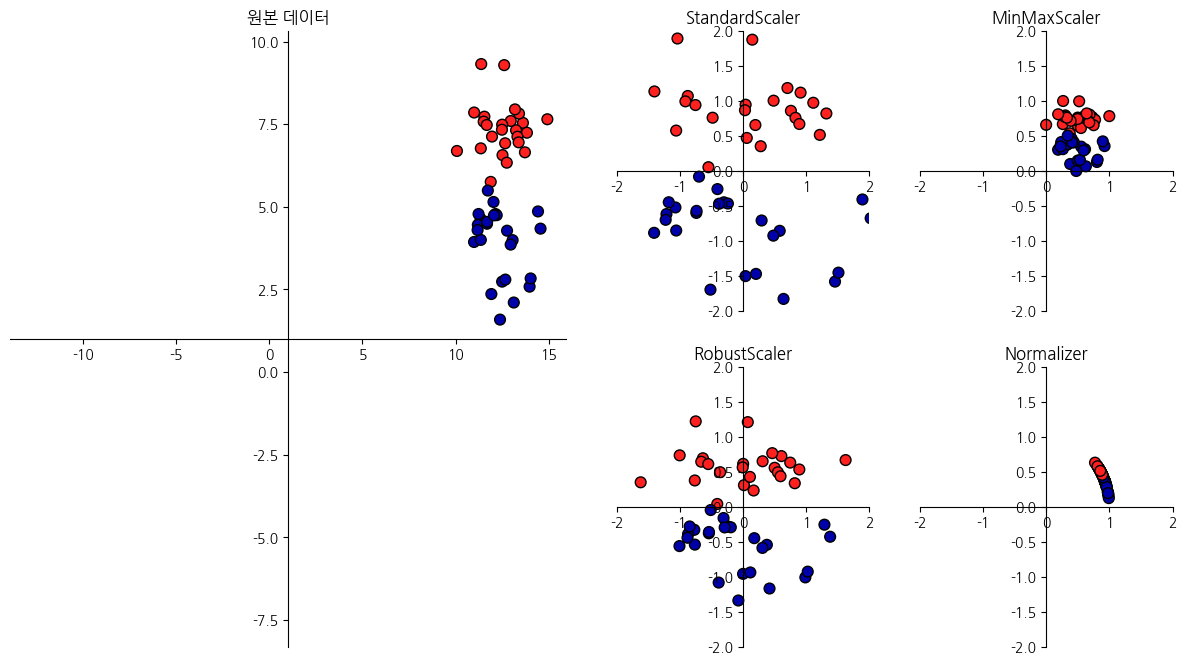

In [3]:
mglearn.plots.plot_scaling()
# 범위가 다른 여러 데이터들을 동일한 범위로 맞춰서 보자. 다들 단위도 범위도 다르니까

In [4]:
#데이터 변환 적용하기

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer=load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)

print(X_train.shape, X_test.shape)


(426, 30) (143, 30)


In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [6]:
scaler.fit(X_train) #스케일러에는 y_train은 넘겨주지 않는다.

MinMaxScaler()

In [7]:
#scaler에 학습 후-> transform메소드를 사용해야 데이터 변환이 이루어짐
X_train_scaled=scaler.transform(X_train)
print("변환 후 크기:", X_train_scaled.shape)
print("스케일 조정 전 특성별 최소값:\n", X_train.min(axis=0)) #axis=0 붙여줘야 행방향(각 열에서) 최솟값 빼옴 
print("스케일 조정 전 특성별 최대값:\n", X_train.max(axis=0))
print("스케일 조정 후 특성별 최소값:\n", X_train_scaled.min(axis=0))
print("스케일 조정 후 특성별 최대값:\n", X_train_scaled.max(axis=0))


변환 후 크기: (426, 30)
스케일 조정 전 특성별 최소값:
 [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
스케일 조정 전 특성별 최대값:
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
스케일 조정 후 특성별 최소값:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
스케일 조정 후 특성별 최대값:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [8]:
#테스트 데이터도 따로 변환 필요함

X_test_scaled=scaler.transform(X_test)
print("스케일 조정 후 특성별 최소값:\n", X_test_scaled.min(axis=0))
print("스케일 조정 후 특성별 최대값:\n", X_test_scaled.max(axis=0))

#훈련데이터 범위는 0.1로 조정되었는데 test데이터는 그걸 넘어서는 들쭉날쭉임을 알 수 있음..

스케일 조정 후 특성별 최소값:
 [ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
스케일 조정 후 특성별 최대값:
 [0.9578778  0.81501522 0.95577362 0.89353128 0.81132075 1.21958701
 0.87956888 0.9333996  0.93232323 1.0371347  0.42669616 0.49765736
 0.44117231 0.28371044 0.48703131 0.73863671 0.76717172 0.62928585
 1.33685792 0.39057253 0.89612238 0.79317697 0.84859804 0.74488793
 0.9154725  1.13188961 1.07008547 0.92371134 1.20532319 1.63068851]


### QuantileTransformer

### 차원 축소-주성분 분석(PCA)

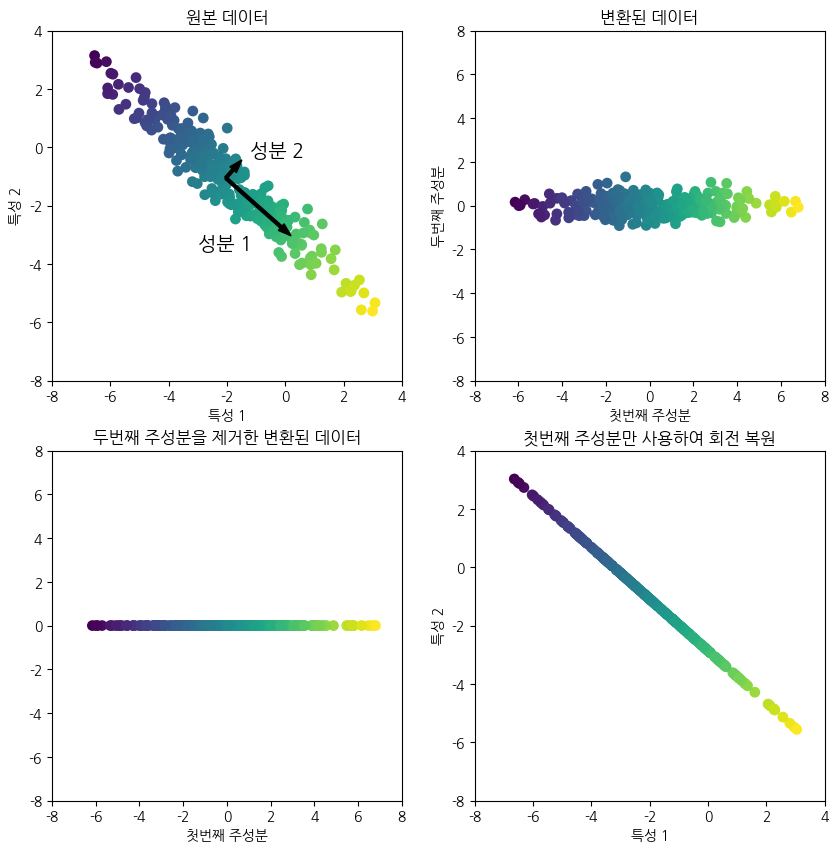

In [10]:
mglearn.plots.plot_pca_illustration()

#주성분 - 주된 분산의 '방향'

In [14]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
#preprocessing에서 scaler

cancer=load_breast_cancer()

scaler=StandardScaler()
scaler.fit(cancer.data)
X_scaled=scaler.transform(cancer.data)

In [15]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(X_scaled) #pca 모델에다가 우리가 스케일 변환한 cancer.data를 훈련시킨다.

X_pca=pca.transform(X_scaled) 
# 중요!!! pca.fit 훈련 후 pca는 주성분 계산이 완료되었지만 축에 나타나기는 위 그림에서 0행0열의 상태임 (새로운 축으로 변환되지 않음)
# 새로운 축 변환을 위해서는 transform 메소드를 호출해야
# 새로운 주성분 축(차원 축소된 공간)으로 투영-이 단계에서 데이터의 차원이 축소됨.
print("원본 데이터 형태:", str(X_scaled.shape))
print("축소된 데이터 형태:", str(X_pca.shape))

원본 데이터 형태: (569, 30)
축소된 데이터 형태: (569, 2)


[[ 9.19283683  1.94858307]
 [ 2.3878018  -3.76817174]
 [ 5.73389628 -1.0751738 ]
 ...
 [ 1.25617928 -1.90229671]
 [10.37479406  1.67201011]
 [-5.4752433  -0.67063679]]


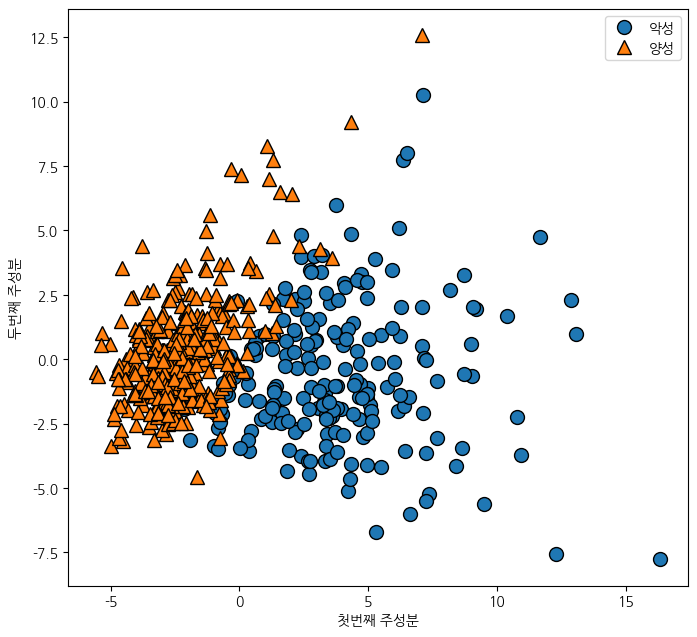

In [23]:
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(X_pca[:,0],X_pca[:,1], cancer.target)
plt.legend(["악성", "양성"], loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("첫번째 주성분")
plt.ylabel("두번째 주성분")
print(X_pca)

In [18]:
print("PCA 주성분 형태:", pca.components_.shape)

# 축은 두개고 각각 30개(cancer.data의 30열)의 가중치를 가지고 있다. 

PCA 주성분 형태: (2, 30)


In [19]:
pca.components_
#첫번째 주성분에서 첫번째 특성의 가중치  0.21890244, 두번째 특성의 가중치 0.10372458 .. 
#두번째 주성분에서 첫번째 특성의 가중치 -0.23385713 .. 

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

Text(0, 0.5, '주성분')

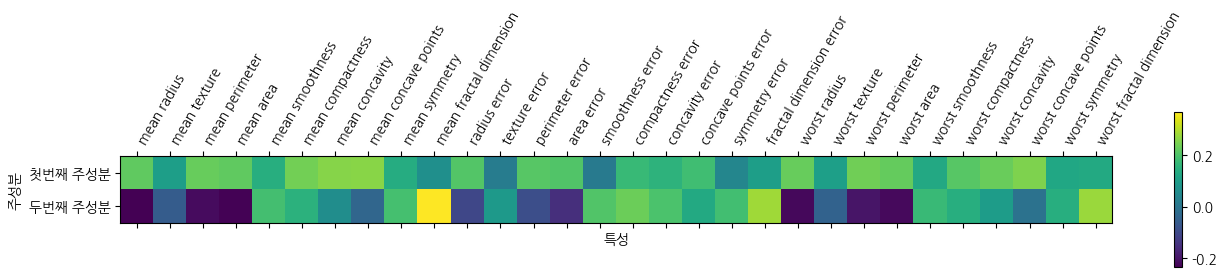

In [24]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0,1], ["첫번째 주성분", "두번째 주성분"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
                 cancer.feature_names, rotation=60, ha='left') #xticks는 (위치, 텍스트, 회전각, 글씨정렬법) 임. feature_names 길이만큼 range생성해서 feature_names 하나하나 할당
plt.xlabel("특성")
plt.ylabel("주성분")

#해석 - 첫번째 주성분은 모두다 양수 부호=>공통의 상호관계가 있다. 비례하는.. 
# 두번째 주성분은 섞여 있어 축의 의미를 설명하기 어려움..